In [5]:
import pandas as pd
import sys
import numpy as np
from tqdm import tqdm

sys.path.append('../src')
from SequenceDataLoader import SequenceDataLoader
from Fishnet import Fishnet

# update local libraries automatically
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
fishnet = Fishnet.load('../Outputs/Test/fishnet_test.pkl')
df = pd.read_csv('../Outputs/Test/urbanization_test.csv')
df.head()

,tile_id,batch_id,year,urbanization_rate,urbanization,Lat,Lon
0,0,0,2017,0.0,0.0,36.869991,-80.170884
1,0,0,2018,0.0,0.0,36.869991,-80.170884
2,0,0,2019,0.0,0.0,36.869991,-80.170884
3,0,0,2020,0.0,0.0,36.869991,-80.170884
4,0,0,2021,0.0,0.0,36.869991,-80.170884


In [11]:
labels = [2016, 2017, 2018, 2019, 2020, 2021, 2022]
filename = "landcover_batchID_"
list_IDs = [filename + str(s) for s in df["batch_id"].unique()]

# Iterate over the DataFrame and group tile IDs based on batch IDs
tile_region_dic = {}
data = df[df.year == 2017]
for _, row in tqdm(data.iterrows(), total=len(data)):
    batch_id = int(row['batch_id'])
    tile_id = int(row['tile_id'])
    key = filename + str(batch_id)
    if batch_id not in tile_region_dic:
        tile_region_dic[batch_id] = []
    tile_region_dic[batch_id].append(tile_id)
    
# rename the keys of the dictionary to match the list_IDs
tile_region_dic = {filename + str(k): v for k, v in tile_region_dic.items()}

# Get the coordinate of each fishnet within each region
fishnet_coordinates = fishnet.fishnet['ImageCoordinates']

# Other inputs
train_dir = '../Images/Test'
dim = (40, 44)

100%|██████████| 329149/329149 [00:03<00:00, 85688.84it/s]


In [47]:
# Initialize the SequenceDataLoader for training data
train_data_loader = SequenceDataLoader(
    labels,
    list_IDs,
    tile_region_dic,
    fishnet_coordinates,
    train_dir,
    dim=dim,
    batch_size=1,
    n_channels=3,
    shuffle=True,
)

In [48]:
X = train_data_loader[0]

In [49]:
X.shape

(4096, 7, 40, 44, 3)

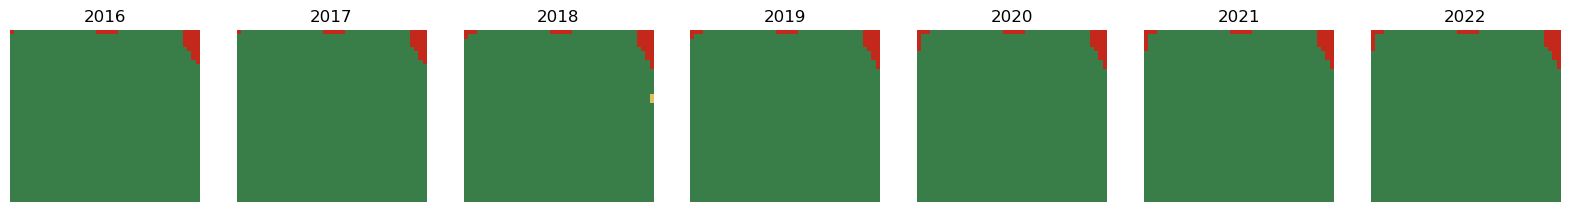

In [78]:
# print 7 images for one specific year for one random sample with seaborn
import matplotlib.pyplot as plt
import seaborn as sns

idx = np.random.randint(0, X.shape[0])
fig, axs = plt.subplots(1, 7, figsize=(20, 10))
plt.title('Sample ' + str(idx))

for i in range(7):
    axs[i].imshow(X[idx, i, :, :, :], cmap='gray')
    axs[i].set_title(labels[i])
    axs[i].axis('off')
plt.show()

In [9]:
# Test the data loader in a training loop
num_epochs = 3

for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    for batch_index in range(len(train_data_loader)):
        print(batch_index)
        X_batch = train_data_loader[batch_index]  # Get the batch input data (X) from the data_loader
        print(f"Batch {batch_index+1}/{len(train_data_loader)}, X_batch shape: {X_batch.shape}")
        # Here, you can use X_batch to train your model or perform any other processing


Epoch 1/3
0


KeyError: 'landcover_batchID_55'

In [ ]:

# Test the data loader in a prediction loop
for batch_index in range(len(data_loader)):
    X_batch = data_loader[batch_index]  # Get the batch input data (X) from the data_loader
    print(f"Batch {batch_index+1}/{len(data_loader)}, X_batch shape: {X_batch.shape}")
    # Here, you can use X_batch to make predictions using your trained model
